# Titanic 
## Section 1 - Data Analysis

### To-Do
1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

5. Categorical variables
    - Cardinality
    
    - Rare Labels
    - Special mappings
    

In [1]:
'''Import Packages'''
# arrays and dataframes
import numpy as np
import pandas as pd

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# yeo-johnson transformation in scipy.stats
import scipy

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

print('Finished importing packages')

Finished importing packages


In [2]:
train = pd.read_csv('train.csv')
print(f'Training Shape: {train.shape}')

test = pd.read_csv('test.csv')
print(f'Test Shape: {test.shape}')

train.head()


Training Shape: (891, 12)
Test Shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
full = pd.concat([train, test], ignore_index = True)
full.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
47,48,1.0,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
340,341,1.0,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
622,623,1.0,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C
129,130,0.0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
564,565,0.0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
219,220,0.0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
155,156,0.0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
128,129,1.0,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C


Survived
0    549
1    342
dtype: int64

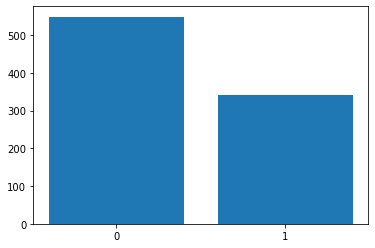

In [4]:
'''1. Dependent Variable'''
labels = [str(x) for x in train.value_counts('Survived').index]
plt.bar(labels, train.value_counts('Survived'))
train.value_counts('Survived')

# uneven but not terribly skewed, no undersampling needed

In [5]:
'''2. Variable Types'''
ignore = ['PassengerId', 'Survived']

cat_vars = [var for var in full.columns if full[var].dtype == 'O' and var not in ignore]
print(f'Categorical Variables: {cat_vars}')
num_vars = [var for var in full.columns if full[var].dtype != 'O' and var not in ignore]
print(f'Numeric Variables: {num_vars}')

Categorical Variables: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numeric Variables: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [6]:
'''3. Missing Data'''
vars_with_na = [var for var in full.columns if full[var].isnull().sum() > 0 and var not in ignore]
print(vars_with_na)

full[vars_with_na].isnull().mean().sort_values(ascending=False)

['Age', 'Fare', 'Cabin', 'Embarked']


Cabin       0.774637
Age         0.200917
Embarked    0.001528
Fare        0.000764
dtype: float64

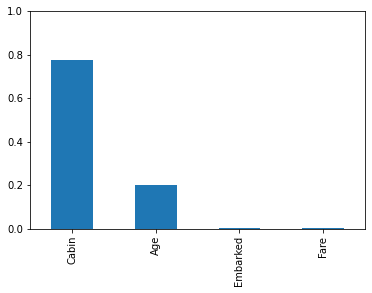

In [7]:
full[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylim([0,1])
plt.show()

In [8]:
cat_vars_na = [x for x in cat_vars if full[x].isnull().sum() > 0]
print(f'Categorical Variables with NA: {cat_vars_na}')
num_vars_na = [x for x in num_vars if full[x].isnull().sum() > 0]
print(f'Numeric Variables with NA: {num_vars_na}')

Categorical Variables with NA: ['Cabin', 'Embarked']
Numeric Variables with NA: ['Age', 'Fare']


In [20]:
def analyze_NA(df, var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(), 1, 0)
    tmp = df.groupby(var)['Survived'].agg(['mean', 'std', 'count'])

    tmp.plot(kind = 'barh', y = 'mean', xerr = 'std'
        , legend = False, title = 'Survived')
    plt.show()

# analyze_NA(train, 'Age')

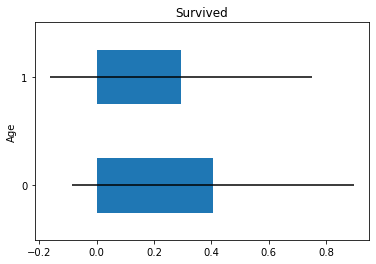

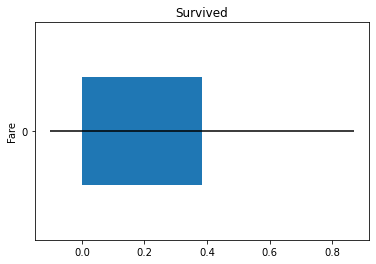

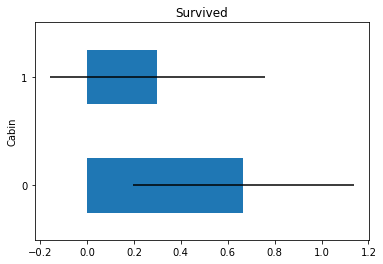

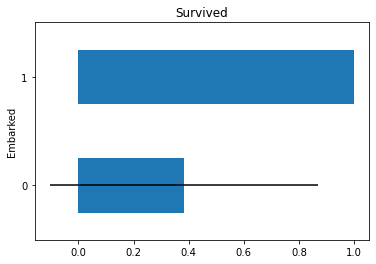

In [21]:
# loop through vars that have NAs to see if a missing value is predictive for a variable
for var in vars_with_na:
    analyze_NA(train, var)

## Fare does not have any missing values in the training set, so there is no information on this
## Missing values for Cabin and Embarked look highly impactful, Age looks somewhat impactful


4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

In [22]:
'''4. Numerical variables'''
## Discrete
# Scatterplots?
# Histograms?
# 

'4. Numerical variables'

In [29]:
print(f'Number of numeric variables: {len(num_vars)}')

Number of numeric variables: 5


In [35]:
discrete_vars, continuous_vars = [], []

for var in num_vars:
    if len(full[var].unique()) <= 10:
        discrete_vars.append(var)
    else:
        continuous_vars.append(var)

print(f'Discrete variables: {discrete_vars}')
print(f'Continuous variables: {continuous_vars}')

Discrete variables: ['Pclass', 'SibSp', 'Parch']
Continuous variables: ['Age', 'Fare']


In [ ]:
## Discrete Variables: CatPlot
## Continuous Variables: Line plot (if time) or Scatterplots

5. Categorical variables
    - Cardinality
    
    - Rare Labels
    - Special mappings